### Loading libraries

In [54]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


### Loading Mnist dataset and segmenting it

In [36]:
mnist_dataset, mnist_info = tfds.load(name="mnist", with_info=True, as_supervised=True)

mnist_train, mnist_test = mnist_dataset["train"], mnist_dataset["test"]

num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples # Get number of samples for validation (10% of training dataset)
num_validation_samples = tf.cast(num_validation_samples,tf.int64)      # Cast the number of samples for validation as int64

num_test_samples = mnist_info.splits['test'].num_examples  # Get number of samples for testing
num_test_samples = tf.cast(num_test_samples,tf.int64)      # Cast the number of samples for testing as int64

def scale(image,label):
    image = tf.cast(image, tf.float32) # Cast data as float32
    image /= 255.   # Divide over 255 and cast it as float32
    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)
scaled_test_data = mnist_test.map(scale)

### Shuffle the data

In [37]:
BUFFER_SIZE = 10000 #Use at most 10000 samples at a time

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

### Set the batch size


Batch size = 1 --> Stochastic Gradient Descent (SGD)

Batch size = #Samples --> Single Batch (GD)

1 < Batch size < #Samples --> Mini-batch (GD)

In [16]:
BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

### Outlining the module

Creating the model

In [25]:
input_size = 784
output_size = 10
hidden_layer_size = 50

model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28,1)),
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),    #Input layer tp hidden layer 1
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),    #Hidden layer 1 to hidden layer 2
                                tf.keras.layers.Dense(output_size, activation='softmax'),    #Hidden layer 2 to Output layer 
                            ])

Choosing optimizer and loss function

- binary_crossentropy --> Data with binary encoder
- categorical_crossentropy --> Data has encoded with one-hot encoder
- sparse_categorical_crossentropy --> Applies one-hot encoder 

In [26]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Training

In [27]:
NUM_EPOCHS = 5

model.fit(  train_data, 
            epochs = NUM_EPOCHS, 
            validation_data = (validation_inputs, validation_targets), 
            verbose = 2 
            )

Epoch 1/5
540/540 - 1s - loss: 0.4177 - accuracy: 0.8824 - val_loss: 0.2208 - val_accuracy: 0.9392 - 1s/epoch - 2ms/step
Epoch 2/5
540/540 - 1s - loss: 0.1904 - accuracy: 0.9449 - val_loss: 0.1561 - val_accuracy: 0.9553 - 669ms/epoch - 1ms/step
Epoch 3/5
540/540 - 1s - loss: 0.1454 - accuracy: 0.9563 - val_loss: 0.1178 - val_accuracy: 0.9670 - 663ms/epoch - 1ms/step
Epoch 4/5
540/540 - 1s - loss: 0.1160 - accuracy: 0.9656 - val_loss: 0.1035 - val_accuracy: 0.9708 - 669ms/epoch - 1ms/step
Epoch 5/5
540/540 - 1s - loss: 0.0965 - accuracy: 0.9714 - val_loss: 0.0879 - val_accuracy: 0.9737 - 664ms/epoch - 1ms/step


### Same problem Higher Width (1000)

The validation accuracy is marginally superior than the obtained with the former model. 
At the last epoch, it tends to overfit
Significantly slower

In [29]:
input_size = 784
output_size = 10
hidden_layer_size = 1000

model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28,1)),
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),    #Input layer tp hidden layer 1
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),    #Hidden layer 1 to hidden layer 2
                                tf.keras.layers.Dense(output_size, activation='softmax'),    #Hidden layer 2 to Output layer 
                            ])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

NUM_EPOCHS = 5

model.fit(  train_data, 
            epochs = NUM_EPOCHS, 
            validation_data = (validation_inputs, validation_targets), 
            verbose = 2 
            )

Epoch 1/5
540/540 - 8s - loss: 0.1945 - accuracy: 0.9407 - val_loss: 0.1020 - val_accuracy: 0.9702 - 8s/epoch - 14ms/step
Epoch 2/5
540/540 - 7s - loss: 0.0757 - accuracy: 0.9761 - val_loss: 0.0662 - val_accuracy: 0.9790 - 7s/epoch - 14ms/step
Epoch 3/5
540/540 - 7s - loss: 0.0500 - accuracy: 0.9838 - val_loss: 0.0507 - val_accuracy: 0.9850 - 7s/epoch - 13ms/step
Epoch 4/5
540/540 - 7s - loss: 0.0371 - accuracy: 0.9885 - val_loss: 0.0592 - val_accuracy: 0.9842 - 7s/epoch - 13ms/step
Epoch 5/5
540/540 - 7s - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.0543 - val_accuracy: 0.9825 - 7s/epoch - 14ms/step


### Same problem Deeper (3 hidden layers)

The validation accuracy is the same gotten with two hidden layers

In [30]:
input_size = 784
output_size = 10
hidden_layer_size = 50

model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28,1)),
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),    #Input layer tp hidden layer 1
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),    #Hidden layer 1 to hidden layer 2
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),    #Hidden layer 2 to hidden layer 3
                                tf.keras.layers.Dense(output_size, activation='softmax'),    #Hidden layer 3 to Output layer 
                            ])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

NUM_EPOCHS = 5

model.fit(  train_data, 
            epochs = NUM_EPOCHS, 
            validation_data = (validation_inputs, validation_targets), 
            verbose = 2 
            )

Epoch 1/5
540/540 - 1s - loss: 0.4117 - accuracy: 0.8803 - val_loss: 0.1900 - val_accuracy: 0.9485 - 1s/epoch - 3ms/step
Epoch 2/5
540/540 - 1s - loss: 0.1699 - accuracy: 0.9501 - val_loss: 0.1356 - val_accuracy: 0.9630 - 693ms/epoch - 1ms/step
Epoch 3/5
540/540 - 1s - loss: 0.1276 - accuracy: 0.9622 - val_loss: 0.1106 - val_accuracy: 0.9658 - 688ms/epoch - 1ms/step
Epoch 4/5
540/540 - 1s - loss: 0.1051 - accuracy: 0.9681 - val_loss: 0.1018 - val_accuracy: 0.9695 - 700ms/epoch - 1ms/step
Epoch 5/5
540/540 - 1s - loss: 0.0897 - accuracy: 0.9731 - val_loss: 0.0764 - val_accuracy: 0.9780 - 682ms/epoch - 1ms/step


### Same problem with change in action function (sigmoid)

Sigmoid gives a lower performance and slower increase in accuracy

In [31]:
input_size = 784
output_size = 10
hidden_layer_size = 50

model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28,1)),
                                tf.keras.layers.Dense(hidden_layer_size, activation='sigmoid'),    #Input layer tp hidden layer 1
                                tf.keras.layers.Dense(hidden_layer_size, activation='sigmoid'),    #Hidden layer 1 to hidden layer 2
                                tf.keras.layers.Dense(output_size, activation='softmax'),    #Hidden layer 2 to Output layer 
                            ])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

NUM_EPOCHS = 5

model.fit(  train_data, 
            epochs = NUM_EPOCHS, 
            validation_data = (validation_inputs, validation_targets), 
            verbose = 2 
            )

Epoch 1/5
540/540 - 1s - loss: 1.0307 - accuracy: 0.7672 - val_loss: 0.4464 - val_accuracy: 0.8918 - 1s/epoch - 2ms/step
Epoch 2/5
540/540 - 1s - loss: 0.3416 - accuracy: 0.9106 - val_loss: 0.2709 - val_accuracy: 0.9302 - 665ms/epoch - 1ms/step
Epoch 3/5
540/540 - 1s - loss: 0.2445 - accuracy: 0.9308 - val_loss: 0.2155 - val_accuracy: 0.9403 - 667ms/epoch - 1ms/step
Epoch 4/5
540/540 - 1s - loss: 0.2003 - accuracy: 0.9431 - val_loss: 0.1825 - val_accuracy: 0.9495 - 667ms/epoch - 1ms/step
Epoch 5/5
540/540 - 1s - loss: 0.1707 - accuracy: 0.9504 - val_loss: 0.1555 - val_accuracy: 0.9567 - 671ms/epoch - 1ms/step


### Same problem with change in action function (tanh)

Sigmoid the same accuracy but slower training

In [32]:
input_size = 784
output_size = 10
hidden_layer_size = 50

model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28,1)),
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),    #Input layer tp hidden layer 1
                                tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),    #Hidden layer 1 to hidden layer 2
                                tf.keras.layers.Dense(output_size, activation='softmax'),    #Hidden layer 2 to Output layer 
                            ])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

NUM_EPOCHS = 5

model.fit(  train_data, 
            epochs = NUM_EPOCHS, 
            validation_data = (validation_inputs, validation_targets), 
            verbose = 2 
            )

Epoch 1/5
540/540 - 1s - loss: 0.3935 - accuracy: 0.8919 - val_loss: 0.1899 - val_accuracy: 0.9440 - 1s/epoch - 3ms/step
Epoch 2/5
540/540 - 1s - loss: 0.1593 - accuracy: 0.9534 - val_loss: 0.1237 - val_accuracy: 0.9648 - 689ms/epoch - 1ms/step
Epoch 3/5
540/540 - 1s - loss: 0.1222 - accuracy: 0.9640 - val_loss: 0.1115 - val_accuracy: 0.9668 - 686ms/epoch - 1ms/step
Epoch 4/5
540/540 - 1s - loss: 0.0995 - accuracy: 0.9701 - val_loss: 0.0908 - val_accuracy: 0.9737 - 686ms/epoch - 1ms/step
Epoch 5/5
540/540 - 1s - loss: 0.0839 - accuracy: 0.9749 - val_loss: 0.0776 - val_accuracy: 0.9772 - 682ms/epoch - 1ms/step


### Same problem with change in BATCH_SIZE (10000)
Accuracy is vely low at the first epoch, and the training is slower than the original BATCH_SIZE of 100

In [38]:
BUFFER_SIZE = 10000 #Use at most 10000 samples at a time

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 10000

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))


input_size = 784
output_size = 10
hidden_layer_size = 50

model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28,1)),
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),    #Input layer tp hidden layer 1
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),    #Hidden layer 1 to hidden layer 2
                                tf.keras.layers.Dense(output_size, activation='softmax'),    #Hidden layer 2 to Output layer 
                            ])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

NUM_EPOCHS = 5

model.fit(  train_data, 
            epochs = NUM_EPOCHS, 
            validation_data = (validation_inputs, validation_targets), 
            verbose = 2 
            )

Epoch 1/5
6/6 - 1s - loss: 2.1906 - accuracy: 0.2547 - val_loss: 1.8985 - val_accuracy: 0.4823 - 1s/epoch - 174ms/step
Epoch 2/5
6/6 - 0s - loss: 1.7512 - accuracy: 0.5519 - val_loss: 1.5106 - val_accuracy: 0.6478 - 481ms/epoch - 80ms/step
Epoch 3/5
6/6 - 1s - loss: 1.3872 - accuracy: 0.6829 - val_loss: 1.2009 - val_accuracy: 0.7210 - 504ms/epoch - 84ms/step
Epoch 4/5
6/6 - 0s - loss: 1.1075 - accuracy: 0.7425 - val_loss: 0.9676 - val_accuracy: 0.7718 - 485ms/epoch - 81ms/step
Epoch 5/5
6/6 - 0s - loss: 0.8975 - accuracy: 0.7908 - val_loss: 0.7963 - val_accuracy: 0.8080 - 490ms/epoch - 82ms/step


### Same problem with change in learning rate (0.0001)
Slower disminution of loss and increasing of accuracy

In [43]:
BUFFER_SIZE = 10000 #Use at most 10000 samples at a time

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))


input_size = 784
output_size = 10
hidden_layer_size = 50

model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28,1)),
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),    #Input layer tp hidden layer 1
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),    #Hidden layer 1 to hidden layer 2
                                tf.keras.layers.Dense(output_size, activation='softmax'),    #Hidden layer 2 to Output layer 
                            ])

custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = custom_optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

NUM_EPOCHS = 5

model.fit(  train_data, 
            epochs = NUM_EPOCHS, 
            validation_data = (validation_inputs, validation_targets), 
            verbose = 2 
            )

Epoch 1/5
540/540 - 1s - loss: 1.2250 - accuracy: 0.6792 - val_loss: 0.5726 - val_accuracy: 0.8585 - 1s/epoch - 2ms/step
Epoch 2/5
540/540 - 1s - loss: 0.4512 - accuracy: 0.8829 - val_loss: 0.3718 - val_accuracy: 0.8985 - 665ms/epoch - 1ms/step
Epoch 3/5
540/540 - 1s - loss: 0.3426 - accuracy: 0.9061 - val_loss: 0.3052 - val_accuracy: 0.9163 - 668ms/epoch - 1ms/step
Epoch 4/5
540/540 - 1s - loss: 0.2961 - accuracy: 0.9179 - val_loss: 0.2690 - val_accuracy: 0.9262 - 661ms/epoch - 1ms/step
Epoch 5/5
540/540 - 1s - loss: 0.2676 - accuracy: 0.9253 - val_loss: 0.2463 - val_accuracy: 0.9313 - 678ms/epoch - 1ms/step


### Same problem with change in learning rate (0.02)
Oscilatory result for accuracy at the final stages of the training

In [45]:
BUFFER_SIZE = 10000 #Use at most 10000 samples at a time

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))


input_size = 784
output_size = 10
hidden_layer_size = 50

model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28,1)),
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),    #Input layer tp hidden layer 1
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),    #Hidden layer 1 to hidden layer 2
                                tf.keras.layers.Dense(output_size, activation='softmax'),    #Hidden layer 2 to Output layer 
                            ])

custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)
model.compile(optimizer = custom_optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

NUM_EPOCHS = 50

model.fit(  train_data, 
            epochs = NUM_EPOCHS, 
            validation_data = (validation_inputs, validation_targets), 
            verbose = 2 
            )

Epoch 1/50
540/540 - 1s - loss: 0.3012 - accuracy: 0.9098 - val_loss: 0.2113 - val_accuracy: 0.9380 - 1s/epoch - 2ms/step
Epoch 2/50
540/540 - 1s - loss: 0.1938 - accuracy: 0.9448 - val_loss: 0.1987 - val_accuracy: 0.9430 - 674ms/epoch - 1ms/step
Epoch 3/50
540/540 - 1s - loss: 0.1792 - accuracy: 0.9495 - val_loss: 0.2154 - val_accuracy: 0.9458 - 669ms/epoch - 1ms/step
Epoch 4/50
540/540 - 1s - loss: 0.1612 - accuracy: 0.9555 - val_loss: 0.1626 - val_accuracy: 0.9575 - 667ms/epoch - 1ms/step
Epoch 5/50
540/540 - 1s - loss: 0.1642 - accuracy: 0.9564 - val_loss: 0.1402 - val_accuracy: 0.9652 - 661ms/epoch - 1ms/step
Epoch 6/50
540/540 - 1s - loss: 0.1463 - accuracy: 0.9600 - val_loss: 0.1649 - val_accuracy: 0.9605 - 669ms/epoch - 1ms/step
Epoch 7/50
540/540 - 1s - loss: 0.1514 - accuracy: 0.9611 - val_loss: 0.1584 - val_accuracy: 0.9595 - 662ms/epoch - 1ms/step
Epoch 8/50
540/540 - 1s - loss: 0.1414 - accuracy: 0.9629 - val_loss: 0.1620 - val_accuracy: 0.9602 - 664ms/epoch - 1ms/step
Epo

In [66]:
input_size = 784
output_size = 10
hidden_layer_size = 500

model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28,1)),
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),    #Input layer tp hidden layer 1
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),    #Hidden layer 1 to hidden layer 2
                                tf.keras.layers.Dense(output_size, activation='softmax'),    #Hidden layer 2 to Output layer 
                            ])


custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = "Adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

NUM_EPOCHS = 12

history = model.fit(  train_data, 
            epochs = NUM_EPOCHS, 
            validation_data = (validation_inputs, validation_targets), 
            verbose = 2 
            )

Epoch 1/12
540/540 - 4s - loss: 0.2202 - accuracy: 0.9344 - val_loss: 0.1356 - val_accuracy: 0.9557 - 4s/epoch - 7ms/step
Epoch 2/12
540/540 - 3s - loss: 0.0829 - accuracy: 0.9748 - val_loss: 0.0778 - val_accuracy: 0.9760 - 3s/epoch - 5ms/step
Epoch 3/12
540/540 - 3s - loss: 0.0538 - accuracy: 0.9830 - val_loss: 0.0542 - val_accuracy: 0.9840 - 3s/epoch - 6ms/step
Epoch 4/12
540/540 - 3s - loss: 0.0394 - accuracy: 0.9873 - val_loss: 0.0409 - val_accuracy: 0.9892 - 3s/epoch - 6ms/step
Epoch 5/12
540/540 - 3s - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0325 - val_accuracy: 0.9897 - 3s/epoch - 6ms/step
Epoch 6/12
540/540 - 3s - loss: 0.0252 - accuracy: 0.9917 - val_loss: 0.0434 - val_accuracy: 0.9868 - 3s/epoch - 6ms/step
Epoch 7/12
540/540 - 3s - loss: 0.0221 - accuracy: 0.9925 - val_loss: 0.0284 - val_accuracy: 0.9915 - 3s/epoch - 6ms/step
Epoch 8/12
540/540 - 3s - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.0231 - val_accuracy: 0.9928 - 3s/epoch - 6ms/step
Epoch 9/12
540/540 - 3s 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


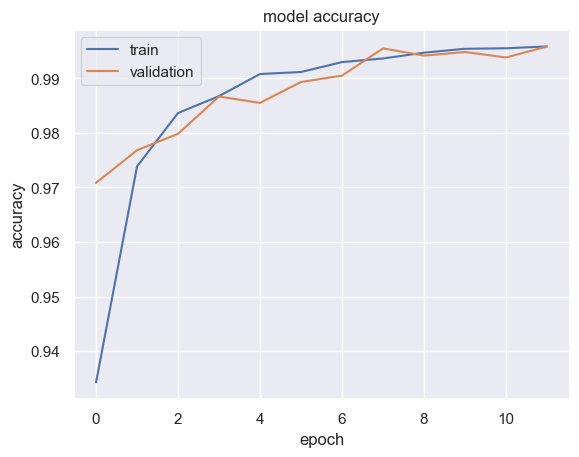

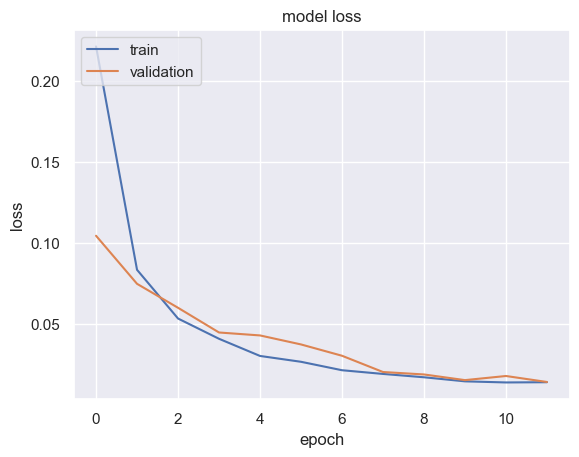

In [65]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Testing the model

In [63]:
test_loss, test_accuracy = model.evaluate(test_data)

print("Test loss: {0:.2f}. Test accuracy: {1:.2f}".format(test_loss, test_accuracy*100.))

1/1 [==============================] - 1s 608ms/step - loss: 0.0812 - accuracy: 0.9820
Test loss: 0.08. Test accuracy: 98.20
